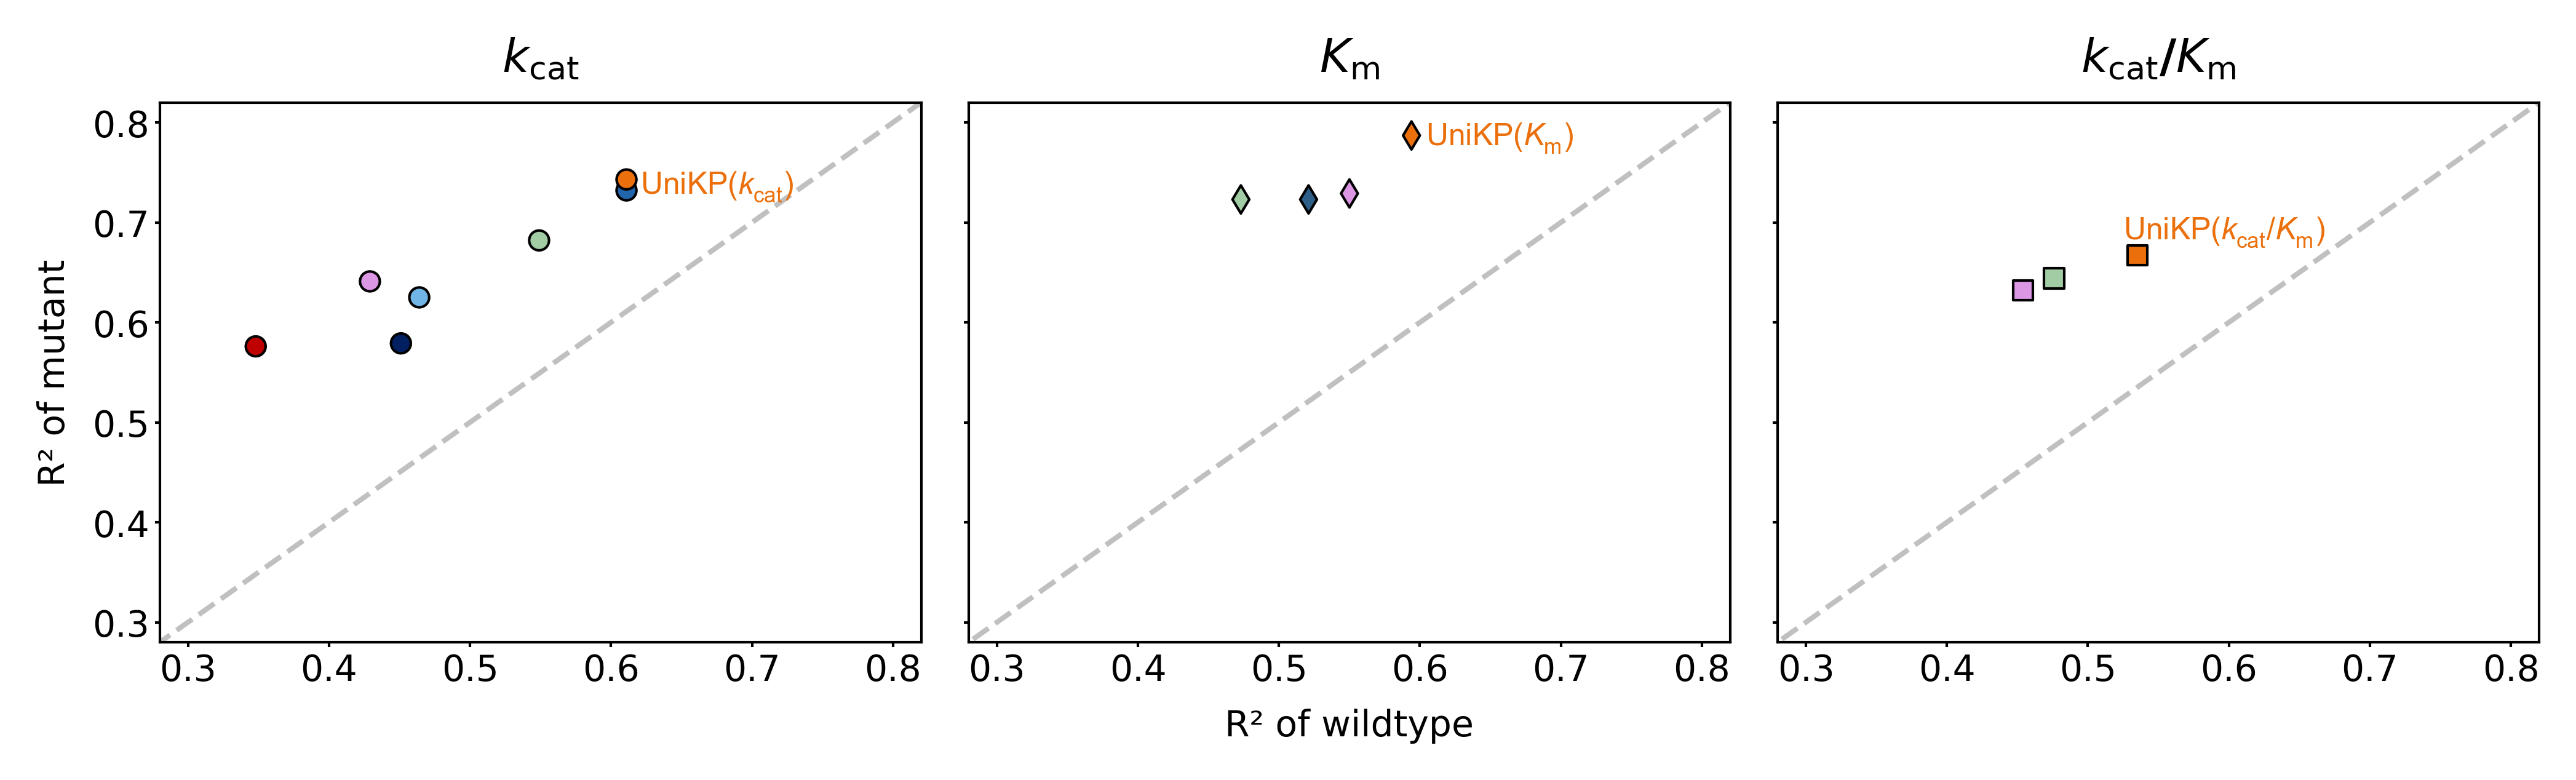

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# --- 1. Data and General Setup ---

# Data points
wildtype_value = [0.451, 0.611, 0.348, 0.611, 0.464, 0.549, 0.429, 0.594, 0.521, 0.473, 0.550, 0.535, 0.476, 0.454]
mutant_value = [0.579, 0.732, 0.576, 0.743, 0.625, 0.682, 0.641, 0.787, 0.723, 0.723, 0.729, 0.667, 0.644, 0.632]

# Labels for each data point
labels = ['DLKcat', 'TurNuP', 'DLTKcat', r'UniKP($\mathit{k}_\mathrm{cat}$)', 'DeepEnzyme', r'EITLEM-Kinetics($\mathit{k}_\mathrm{cat}$)', r'CataPro($\mathit{k}_\mathrm{cat}$)', r'UniKP($\mathit{K}_\mathrm{m}$)', 'Boost-Km', r'EITLEM-Kinetics($\mathit{K}_\mathrm{m}$)', r'CataPro($\mathit{K}_\mathrm{m}$)', r'UniKP($\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$)', r'EITLEM-Kinetics($\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$)', r'CataPro($\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$)']

# Color mapping for each unique model
model_color_map = {
    'DLKcat': '#022061',
    'TurNuP': '#2166AC',
    'Boost-Km': '#2D5F89',
    'DLTKcat': '#BF0001',
    'DeepEnzyme': '#71B4E6',
    'UniKP': '#EB700C',
    'EITLEM-Kinetics': '#A2CCA4',
    'CataPro': '#DB97E4'
}

# Helper function to get base model name from a label
def get_base_model(label):
    for model_name in model_color_map:
        if model_name in label:
            return model_name
    return None

# Generate the full color list for all data points
colors = [model_color_map[get_base_model(label)] for label in labels]

# --- 2. Create Figure and Subplots ---
# Create a figure with 1 row and 3 columns of subplots. Share the Y-axis for consistent scaling.
fig, axes = plt.subplots(1, 3, figsize=(7, 2.5), dpi=600, sharey=True)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

# Data slicing indices and properties for each subplot
plot_info = {
    'kcat': {'slice': slice(0, 7), 'marker': 'o', 'title': r'$\mathbf{\mathit{k}_\mathrm{cat}}$'},
    'km': {'slice': slice(7, 11), 'marker': 'd', 'title': r'$\mathbf{\mathit{K}_\mathrm{m}}$'},
    'kcat_km': {'slice': slice(11, 14), 'marker': 's', 'title': r'$\mathbf{\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}}$'}
}

# --- 3. Loop Through Subplots to Plot Data and Apply Styles ---
for i, (param_type, info) in enumerate(plot_info.items()):
    ax = axes[i]
    s = info['slice']
    
    # Plot scatter points
    ax.scatter(wildtype_value[s], mutant_value[s], marker=info['marker'], color=colors[s],
               edgecolor='black', linewidths=0.5, s=15, zorder=2)
    
    # Add text labels for each point, using original fine-tuned positions
    # This is done by checking which original points fall into the current slice
    for j in range(s.start, s.stop):
        dx, dy, ha, va = (0, 0, 'center', 'center') # Default offsets
        # Manually set offsets and alignment for each label to avoid overlap
        if j == 0: dx, dy, ha, va = (0.01, -0.01, 'left', 'top')    # DLKcat
        if j == 1: dx, dy, ha, va = (0.01, -0.02, 'left', 'top')    # TurNuP
        if j == 2: dx, dy, ha, va = (-0.01, 0.01, 'right', 'bottom')# DLTKcat
        if j == 3: dx, dy, ha, va = (0.01, 0.01, 'left', 'top')    # UniKP(kcat)
        if j == 4: dx, dy, ha, va = (0.01, -0.03, 'left', 'top')    # DeepEnzyme
        if j == 5: dx, dy, ha, va = (0.01, -0.01, 'left', 'top')    # EITLEM-Kinetics(kcat)
        if j == 6: dx, dy, ha, va = (-0.01, 0, 'right', 'center')   # CataPro(kcat)
        if j == 7: dx, dy, ha, va = (0.01, 0.015, 'left', 'top')    # UniKP(Km)
        if j == 8: dx, dy, ha, va = (-0.01, -0.01, 'right', 'top')  # Boost-Km
        if j == 9: dx, dy, ha, va = (-0.01, 0.01, 'right', 'bottom')# EITLEM-Kinetics(Km)
        if j == 10: dx, dy, ha, va = (0, -0.03, 'left', 'top')     # CataPro(Km)
        if j == 11: dx, dy, ha, va = (-0.01, 0.04, 'left', 'top')  # UniKP(kcat/km)
        if j == 12: dx, dy, ha, va = (0.017, -0.013, 'left', 'top') # EITLEM-Kinetics(kcat/km)
        if j == 13: dx, dy, ha, va = (0.02, -0.017, 'left', 'top')  # CataPro(kcat/km)
        if j ==3 or j == 7 or j == 11:
            ax.text(wildtype_value[j] + dx, mutant_value[j] + dy, labels[j],
                fontsize=6, color=colors[j], ha=ha, va=va)

    # Apply common styling to each subplot
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.tick_params(axis='both', direction='out', width=0.5, which='both', length=1, pad=1)
    
    ticks = np.arange(0.3, 0.9, 0.1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.tick_params(axis='both', labelsize=7)

    ax.set_ylim(0.28, 0.82)
    ax.set_xlim(0.28, 0.82)
    
    # Plot y=x line
    ax.plot([0, 2], [0, 2], color='silver', linestyle='--', linewidth=1, zorder=1)
    
    # Set title and axis labels
    ax.set_title(info['title'], fontsize=9)
    if i==1:
        ax.set_xlabel('R² of wildtype', fontsize=7)

# Set a single y-label for the entire figure on the first subplot
axes[0].set_ylabel('R² of mutant', fontsize=7)


# --- 4. Create and Place the Shared Legend ---

# a. Create handles for marker shapes
marker_handles = [
    Line2D([0], [0], marker='o', color='w', label=r'$\mathit{k}_\mathrm{cat}$ model', markersize=4,
           markerfacecolor='none', markeredgecolor='black', markeredgewidth=0.5),
    Line2D([0], [0], marker='d', color='w', label=r'$\mathit{K}_\mathrm{m}$ model', markersize=4,
           markerfacecolor='none', markeredgecolor='black', markeredgewidth=0.5),
    Line2D([0], [0], marker='s', color='w', label=r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$ model', markersize=4,
           markerfacecolor='none', markeredgecolor='black', markeredgewidth=0.5)
]
# b. Create handles for model colors and their capabilities
model_capabilities = {model_name: set() for model_name in model_color_map}
param_strings = {
    'kcat': r'$\mathit{k}_\mathrm{cat}$',
    'km': r'$\mathit{K}_\mathrm{m}$',
    'kcat_km': r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$'
}

for i in range(0, 7):
    model_capabilities[get_base_model(labels[i])].add(param_strings['kcat'])
for i in range(7, 11):
    model_capabilities[get_base_model(labels[i])].add(param_strings['km'])
for i in range(11, 14):
    model_capabilities[get_base_model(labels[i])].add(param_strings['kcat_km'])

# --- 5. Final Adjustments and Saving ---
# Adjust layout to prevent title/label overlap and make space for the legend
plt.subplots_adjust(left=0.1, right=0.98, bottom=0.3, top=0.85, wspace=0.2)
fig.tight_layout(rect=[0, 0.1, 1, 0.95]) # rect=[left, bottom, right, top]
# Save and show the figure
plt.savefig('../../Figure/fig2f.pdf', dpi=600, bbox_inches='tight')
plt.show()

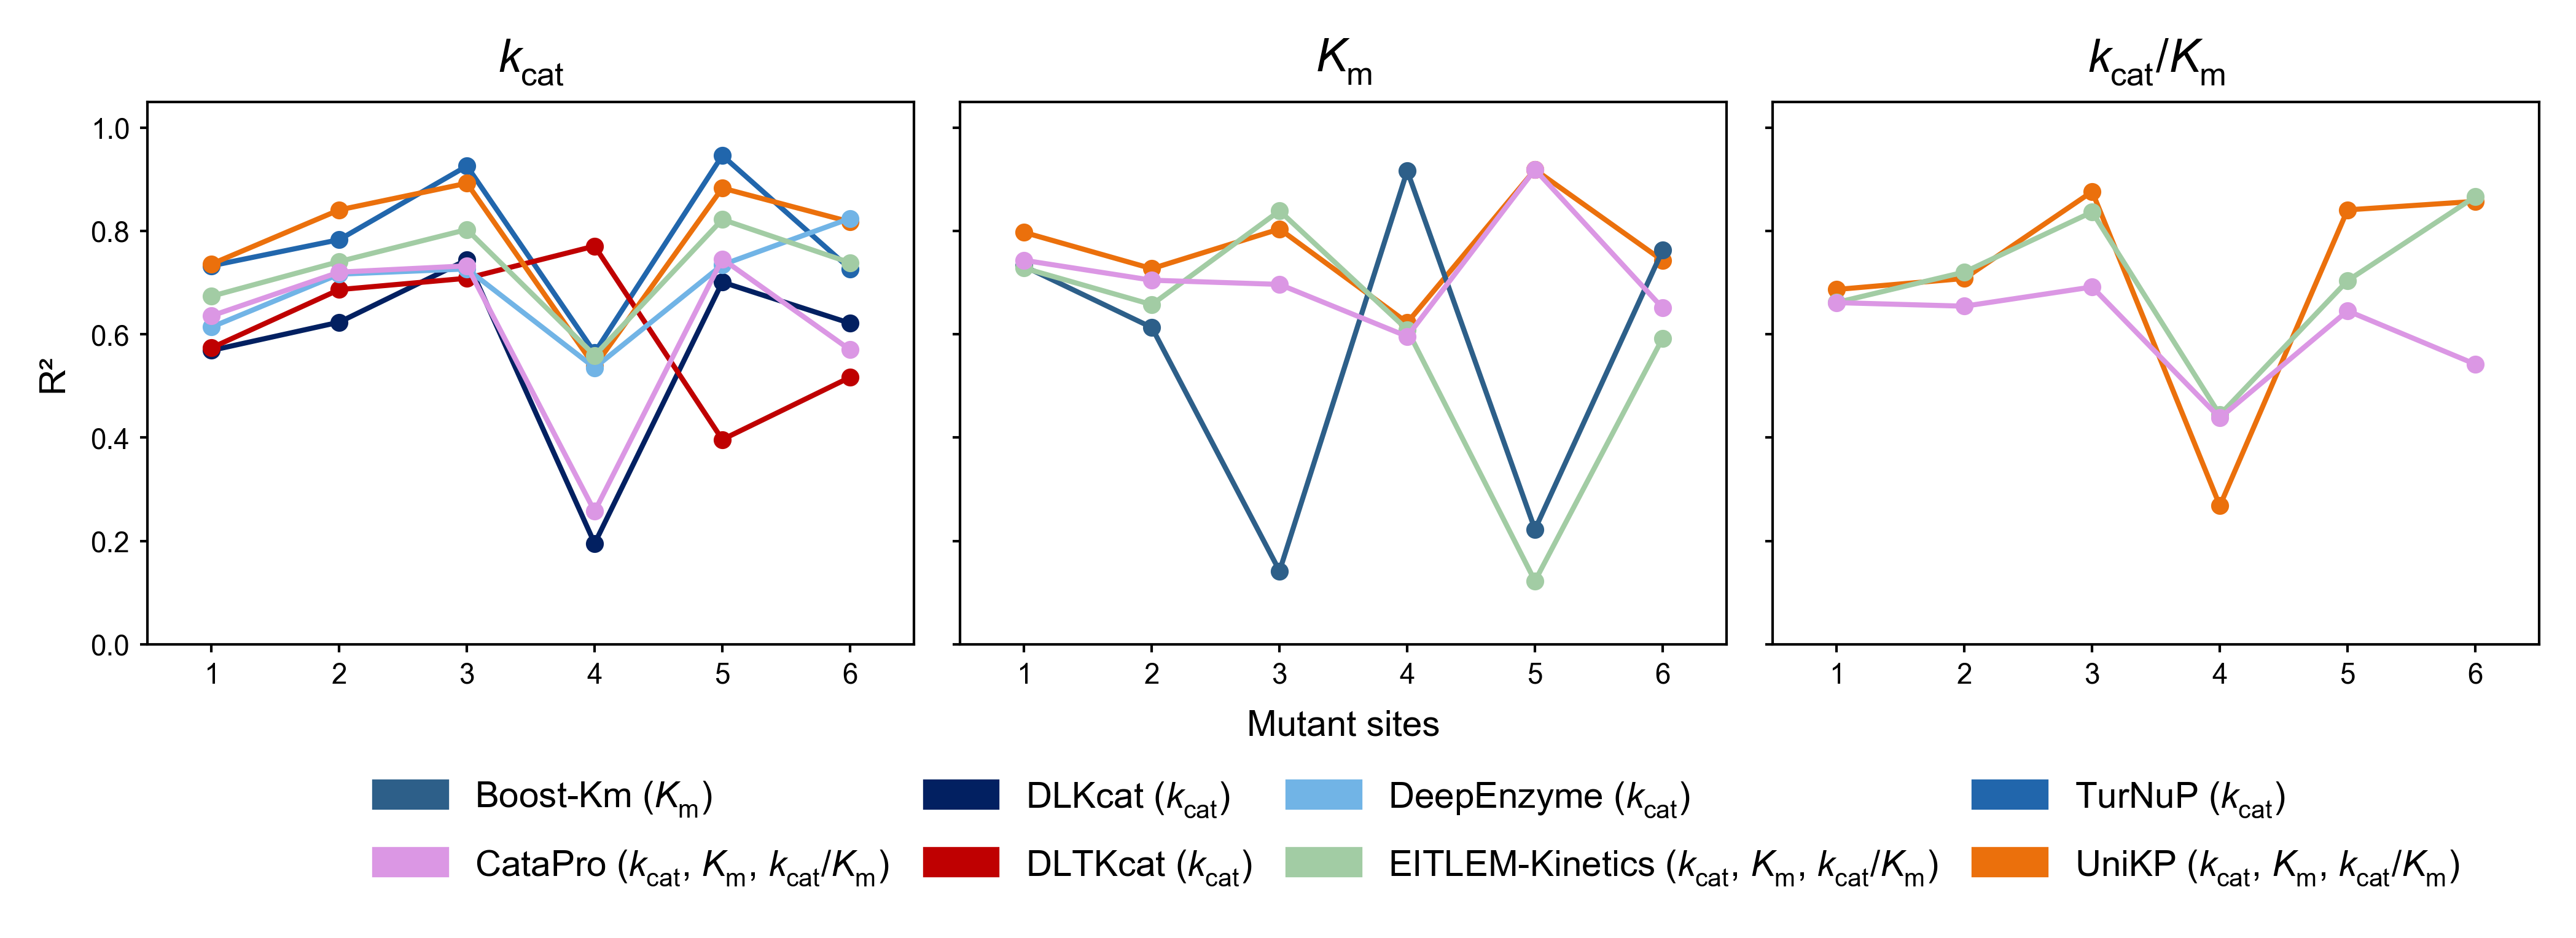

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Data Definition ---
result1 = {
    'DLKcat': [0.5689, 0.6235, 0.7441, 0.1951, 0.7011, 0.6215],
    'TurNuP':[0.7328, 0.7833, 0.9259, 0.5647, 0.9463, 0.7269],
    'DLTKcat': [0.5738, 0.6866, 0.7086, 0.7709, 0.3962, 0.5168],
    'UniKP(kcat)': [0.7361, 0.8409, 0.8926, 0.5382, 0.8832, 0.8178],
    'DeepEnzyme': [0.6140, 0.7165, 0.7267, 0.5354, 0.7346, 0.8245],
    'EITLEM-Kinetic(kcat)': [0.6738, 0.7409, 0.8029, 0.5591, 0.8224, 0.7387],
    'CataPro(kcat)': [0.6358, 0.7204, 0.7326, 0.2572, 0.7460, 0.5701],
}
result2 = {
    'UniKP(Km)': [0.7974, 0.7272, 0.8040, 0.6226, 0.9189, 0.7429],
    'Boost-Km': [0.7318, 0.6132, 0.1417, 0.9167, 0.2223, 0.7629],
    'EITLEM-Kinetic(Km)': [0.7282, 0.6575, 0.8392, 0.6091, 0.1223, 0.5925],
    'CataPro(km)': [0.7434, 0.7048, 0.6967, 0.5960, 0.9192, 0.6509],
}
result3 = {
    'UniKP(kcat/Km)': [0.6869, 0.7082, 0.8764, 0.2680, 0.8410, 0.8575],
    'EITLEM-Kinetic(kcat/Km)': [0.6617, 0.7206, 0.8369, 0.4442, 0.7039, 0.8666],
    'CataPro(kcat/Km)': [0.6614, 0.6545, 0.6917, 0.4381, 0.6455, 0.5422],    
}

# --- 2. Unified Style Definition ---
# Uniformly define the colors and markers for all models to avoid repetition and ensure consistency.
# Note: UniKP, EITLEM-Kinetic, and CataPro are the same models across different subplots and should use the same color.

model_styles = {
    'DLKcat':               {'color': '#022061', 'marker': 'o'},
    'TurNuP':               {'color': '#2166AC', 'marker': 'o'},
    'DLTKcat':              {'color': '#BF0001', 'marker': 'o'},
    'UniKP':                {'color': '#EB700C', 'marker': 'o'},
    'DeepEnzyme':           {'color': '#71B4E6', 'marker': 'o'},
    'EITLEM-Kinetic':       {'color': '#A2CCA4', 'marker': 'o'},
    'CataPro':              {'color': '#DB97E4', 'marker': 'o'},
    'Boost-Km':             {'color': '#2D5F89', 'marker': 'o'},
}

# Helper function to extract the base model name from the full label
def get_base_model(label):
    if 'UniKP' in label: return 'UniKP'
    if 'EITLEM-Kinetic' in label: return 'EITLEM-Kinetic'
    if 'CataPro' in label: return 'CataPro'
    return label.split('(')[0] # For other models, return the name directly

# --- 3. Create Subplots and Plot ---
# Create a 1-row, 3-column subplot layout, sharing the y-axis
fig, axes = plt.subplots(1, 3, figsize=(7, 2.5), dpi=600, sharey=True)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  # Important: Allow custom math fonts
    'mathtext.rm': 'Arial',        # Set Roman font (e.g., for \mathrm)
    'mathtext.it': 'Arial:italic', # Set Italic font (e.g., for \mathit)
    'mathtext.bf': 'Arial:bold',   # Set Bold font (e.g., for \mathbf)
    'pdf.fonttype': 42,            # Ensure fonts are embedded as TrueType for editability in AI
    'ps.fonttype': 42
})

all_results = [result1, result2, result3]
titles = [r'$\mathit{k}_\mathrm{cat}$', r'$\mathit{K}_\mathrm{m}$', r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$']
x_pos = range(1, 7)
legend_handles = {} # Used to collect legend handles to avoid duplicates

for i, ax in enumerate(axes):
    data_dict = all_results[i]
    
    # Plot each line
    for label, data in data_dict.items():
        base_model = get_base_model(label)
        style = model_styles[base_model]
        
        line, = ax.plot(x_pos, data,
                        marker=style['marker'],
                        color=style['color'],
                        markersize=2.5,
                        linestyle='-',
                        linewidth=1,
                        label=base_model) # Use the base model name as the legend label
        
        # If the legend for this model hasn't been added yet, add it
        if base_model not in legend_handles:
            legend_handles[base_model] = line

    # --- 4. Set Axes and Titles ---
    ax.set_ylim(0, 1.05)
    ax.set_xlim(0.5, 6.5)
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticks(range(1, 7))
    ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
    ax.tick_params(axis='both', direction='out', width=0.5, length=1.5, pad=2, labelsize=5.5)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(0.5)
    ax.set_title(titles[i], fontsize=9)

# Set shared axis labels
axes[0].set_ylabel('R²', fontsize=7)
axes[1].set_xlabel('Mutant sites', fontsize=7)

# --- 5. Create a Unified Legend ---
# Get legend handles and labels in dictionary order to ensure a consistent order each time
sorted_handles = [legend_handles[key] for key in sorted(legend_handles)]
fig.legend(handles=sorted_handles, 
           loc='lower center',             # Place at the bottom center
           bbox_to_anchor=(0.5, 0),     # Fine-tune the position to be below the x-axis label
           ncol=4,                         # Display in 4 columns
           frameon=False,                  # Remove the border
           fontsize=7)

# The following code block seems incomplete and refers to undefined variables.
# It has been commented out to allow the script to run with the legend defined above.

# from matplotlib.patches import Patch
# # Now, create legend items based on the information above
# color_handles = []
# # Define the order in which parameters are displayed in the legend
# param_order = [param_strings['kcat'], param_strings['km'], param_strings['kcat_km']]
#
# # Sort by model name to ensure a fixed legend order
# for name, color in sorted(model_color_map.items()):
#     # Get the list of capabilities for the model and sort it in the predefined order
#     caps = sorted(list(model_capabilities[name]), key=lambda p: param_order.index(p))
#     # Create a capability description string, e.g., (k_cat, K_m)
#     cap_str = f"({', '.join(caps)})"
#     full_label = f"{name} {cap_str}"
#     color_handles.append(Patch(color=color, label=full_label))
#
# # c. Combine all handles and create the figure-level legend
# all_handles = color_handles
# # print(all_handles, sorted_handles)
# fig.legend(handles=all_handles,
#            loc='lower center',       # Position below the subplots
#            bbox_to_anchor=(0.55, -0.05), # Fine-tune the position
#            ncol=4,                   # Arrange in 4 columns
#            frameon=False,
#            fontsize=7,
#            labelspacing=0.8,         # Adjust spacing between rows
#            columnspacing=1.0)        # Adjust spacing between columns

# Adjust subplot spacing and overall layout to make room for the legend and title
fig.tight_layout(rect=[0, 0.1, 1, 0.95]) # rect=[left, bottom, right, top]

# Save and display the image
plt.savefig('../../Figure/fig2g.pdf', dpi=600, bbox_inches='tight')
plt.show()